<a href="https://colab.research.google.com/github/hikaru-okinawa/lodging_price/blob/main/lodging_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#前処理

In [ ]:
#データの読み込み
df_train_lodging = pd.read_csv('/content/drive/MyDrive/python_for_beginner/民泊サービス/train.csv')
df_test_lodging = pd.read_csv('/content/drive/MyDrive/python_for_beginner/民泊サービス/test.csv')

In [ ]:
#学習データのサイズの確認
df_train_lodging.shape
df_train_lodging.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,...,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,...,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,...,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


In [ ]:
df_train_lodging.shape

(55583, 29)

In [ ]:
#テストデータのサイズの確認
df_test_lodging.shape
df_test_lodging.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
0,0,6,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2.0,Real Bed,2.0,2.0,strict,Boston,t,...,42.359278,-71.069962,Gorgeous 2BR/2BA Duplex in Beacon Hill,Beacon Hill,58,House,90.0,Entire home/apt,https://a0.muscache.com/im/pictures/7e4808b4-5...,02114
1,1,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,moderate,LA,t,...,34.084747,-118.367355,Luxury 1 Bedroom West Hollywood City Center,West Hollywood,4,Guesthouse,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/5392fbd6-6...,90046
2,2,2,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1.0,Real Bed,0.0,1.0,flexible,NYC,f,...,40.720541,-73.959192,Bedroom with Patio in Prime Williamsburg Locat...,Williamsburg,0,Apartment,NaN,Private room,https://a0.muscache.com/im/pictures/544d3b89-d...,11249.0
3,3,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,2.0,strict,NYC,f,...,40.681117,-73.944091,Cozy apartment in Brooklyn,Bedford-Stuyvesant,0,Apartment,NaN,Entire home/apt,https://a0.muscache.com/im/pictures/26baf7ba-0...,11216
4,4,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.5,Real Bed,1.0,2.0,strict,LA,t,...,34.150995,-118.409359,"Cozy, sunny, pet friendly loft/apt",NaN,6,Loft,92.0,Entire home/apt,https://a0.muscache.com/im/pictures/86107545/9...,91604


In [ ]:
#学習データのデータ型の確認
df_train_lodging.dtypes

id                          int64
accommodates                int64
amenities                  object
bathrooms                 float64
bed_type                   object
bedrooms                  float64
beds                      float64
cancellation_policy        object
city                       object
cleaning_fee               object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
property_type              object
review_scores_rating      float64
room_type                  object
thumbnail_url              object
zipcode                    object
y                         float64
dtype: object

In [ ]:
#欠損データの確認(train)
df_train_lodging.isnull().sum()

id                            0
accommodates                  0
amenities                     0
bathrooms                   147
bed_type                      0
bedrooms                     71
beds                         96
cancellation_policy           0
city                          0
cleaning_fee                  0
description                   0
first_review              11908
host_has_profile_pic        148
host_identity_verified      148
host_response_rate        13704
host_since                  148
instant_bookable              0
last_review               11880
latitude                      0
longitude                     0
name                          0
neighbourhood              5160
number_of_reviews             0
property_type                 0
review_scores_rating      12556
room_type                     0
thumbnail_url              6145
zipcode                     716
y                             0
dtype: int64

In [ ]:
#欠損データの確認(test)
df_test_lodging.isnull().sum()

id                           0
accommodates                 0
amenities                    0
bathrooms                   53
bed_type                     0
bedrooms                    20
beds                        35
cancellation_policy          0
city                         0
cleaning_fee                 0
description                  0
first_review              3956
host_has_profile_pic        40
host_identity_verified      40
host_response_rate        4595
host_since                  40
instant_bookable             0
last_review               3947
latitude                     0
longitude                    0
name                         0
neighbourhood             1712
number_of_reviews            0
property_type                0
review_scores_rating      4166
room_type                    0
thumbnail_url             2071
zipcode                    250
dtype: int64

In [ ]:
#欠損データの削除
df_train_lodging = df_train_lodging.dropna()

In [ ]:
#欠損データを削除した後のデータのサイズの確認
df_train_lodging.shape

(28892, 29)

In [ ]:
#データのコピー
df_train_lodging1 = df_train_lodging.copy()

In [ ]:
#不要コラムの消去
df_train_lodging1 = df_train_lodging1.drop(columns=['amenities','description', 'name', 'thumbnail_url', 'zipcode'])

In [ ]:
#コラムリスト
columns_list = df_train_lodging1.columns
print(columns_list)

Index(['id', 'accommodates', 'bathrooms', 'bed_type', 'bedrooms', 'beds',
       'cancellation_policy', 'city', 'cleaning_fee', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'neighbourhood', 'number_of_reviews', 'property_type',
       'review_scores_rating', 'room_type', 'y'],
      dtype='object')


#float列をintに変換

In [ ]:
# float型からint型に変換
df_train_lodging1['bathrooms'] = df_train_lodging1['bathrooms'].astype(int)
df_train_lodging1['bedrooms'] = df_train_lodging1['bedrooms'].astype(int)
df_train_lodging1['beds'] = df_train_lodging1['beds'].astype(int)
df_train_lodging1['latitude'] = df_train_lodging1['latitude'].astype(int)
df_train_lodging1['longitude'] = df_train_lodging1['longitude'].astype(int)
df_train_lodging1['review_scores_rating'] = df_train_lodging1['review_scores_rating'].astype(int)
df_train_lodging1['y'] = df_train_lodging1['y'].astype(int)

#カテゴリ変数を数値化する
######amenities → 削除
######bed_type → one-hot
######cancellation_policy → label Encoding
######city → one-hot
######cleaning_fee → one-hot
######description → 削除
######first_review → 日付を年、月、日の数値に分割する
######host_has_profile_pic → one-hot
######host_identity_verified → one-hot     
######host_response_rate → label Encoding          
######host_since → 日付を年、月、日の数値に分割する                
######instant_bookable → one-hot            
######last_review → 日付を年、月、日の数値に分割する
######name → 削除
######neighbourhood → one-hot
######property_type → one-hot
######room_type → one-hot                
######thumbnail_url → 削除           
######zipcode → 削除


In [ ]:
#bed type onehotエンコーディング
ohe_bed_type = pd.get_dummies(df_train_lodging1['bed_type'], prefix='bed_type')
df_train_lodging1 = pd.concat([df_train_lodging1, ohe_bed_type], axis=1)
#bed_typeコラムの削除(文字列)
df_train_lodging1 = df_train_lodging1.drop(columns=['bed_type'])

<Axes: xlabel='cancellation_policy', ylabel='count'>

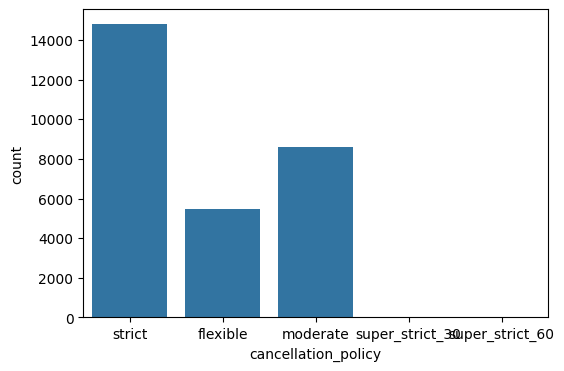

In [ ]:
#cancellation_policy データを可視化
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train_lodging1, x='cancellation_policy')
#plt.show()

In [ ]:
#cancellation_policy → label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train_lodging1['cancellation_policy'] = le.fit_transform(df_train_lodging1['cancellation_policy'])
#df_train_lodging1.head()

In [ ]:
#city onehotエンコーディング
ohe_city = pd.get_dummies(df_train_lodging1['city'], prefix='city')
df_train_lodging1 = pd.concat([df_train_lodging1, ohe_city], axis=1)
#bed_typeコラムの削除(文字列)
df_train_lodging1 = df_train_lodging1.drop(columns=['city'])

In [ ]:
#cleaning_fee onehotエンコーディング
ohe_cleaning_fee = pd.get_dummies(df_train_lodging1['cleaning_fee'], prefix='cleaning_fee')
df_train_lodging1 = pd.concat([df_train_lodging1, ohe_cleaning_fee], axis=1)
#bed_typeコラムの削除(文字列)
df_train_lodging1 = df_train_lodging1.drop(columns=['cleaning_fee'])

In [ ]:
#host_has_profile_pic onehotエンコーディング
ohe_host_has_profile_pic = pd.get_dummies(df_train_lodging1['host_has_profile_pic'], prefix='host_has_profile_pic')
df_train_lodging1 = pd.concat([df_train_lodging1, ohe_host_has_profile_pic], axis=1)
#bed_typeコラムの削除(文字列)
df_train_lodging1 = df_train_lodging1.drop(columns=['host_has_profile_pic'])

In [ ]:
#host_identity_verified onehotエンコーディング
ohe_host_identity_verified = pd.get_dummies(df_train_lodging1['host_identity_verified'], prefix='host_identity_verified')
df_train_lodging1 = pd.concat([df_train_lodging1, ohe_host_identity_verified], axis=1)
#bed_typeコラムの削除(文字列)
df_train_lodging1 = df_train_lodging1.drop(columns=['host_identity_verified'])

In [ ]:
#host_response_rate → label Encoding

df_train_lodging1['host_response_rate'] = le.fit_transform(df_train_lodging1['host_response_rate'])
#df_train_lodging1.head()

In [ ]:
#instant_bookable onehotエンコーディング
ohe_instant_bookable = pd.get_dummies(df_train_lodging1['instant_bookable'], prefix='instant_bookable')
df_train_lodging1 = pd.concat([df_train_lodging1, ohe_instant_bookable], axis=1)
#bed_typeコラムの削除(文字列)
df_train_lodging1 = df_train_lodging1.drop(columns=['instant_bookable'])

In [ ]:
#neighbourhood onehotエンコーディング
ohe_neighbourhood = pd.get_dummies(df_train_lodging1['neighbourhood'], prefix='neighbourhood')
df_train_lodging1 = pd.concat([df_train_lodging1, ohe_neighbourhood], axis=1)
#bed_typeコラムの削除(文字列)
df_train_lodging1 = df_train_lodging1.drop(columns=['neighbourhood'])

In [ ]:
#property_type onehotエンコーディング
ohe_property_type = pd.get_dummies(df_train_lodging1['property_type'], prefix='property_type')
df_train_lodging1 = pd.concat([df_train_lodging1, ohe_property_type], axis=1)
#bed_typeコラムの削除(文字列)
df_train_lodging1 = df_train_lodging1.drop(columns=['property_type'])

In [ ]:
#room_type onehotエンコーディング
ohe_room_type = pd.get_dummies(df_train_lodging1['room_type'], prefix='room_type')
df_train_lodging1 = pd.concat([df_train_lodging1, ohe_room_type], axis=1)
#bed_typeコラムの削除(文字列)
df_train_lodging1 = df_train_lodging1.drop(columns=['room_type'])

In [ ]:
#日付データの消去
df_train_lodging1 = df_train_lodging1.drop(columns=['first_review','host_since', 'last_review'])

In [ ]:
df_train_lodging1.head()

,id,accommodates,bathrooms,bedrooms,beds,cancellation_policy,host_response_rate,latitude,longitude,number_of_reviews,...,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
1,1,2,1,1,1,2,2,38,-76,9,...,0,0,0,0,0,0,0,0,1,0
4,4,2,1,1,1,2,2,40,-73,5,...,0,0,0,0,0,0,0,1,0,0
5,5,2,1,1,1,0,2,40,-74,7,...,0,0,0,0,0,0,0,0,1,0
6,6,2,1,1,1,1,2,40,-73,65,...,0,0,0,0,0,0,0,0,1,0
8,8,2,1,1,1,2,2,37,-122,21,...,0,0,0,0,0,0,0,0,1,0


#numpy array 型に変換

In [ ]:
t = df_train_lodging1['y'].values

In [ ]:
x = df_train_lodging1.drop(labels=['y'], axis=1).values

#学習データと検証データの分割

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, t_train)

LinearRegression()

In [ ]:
train_score = model.score(x_train, t_train)
train_score

0.6329156997356461

In [ ]:
val_pred = model.predict(x_test)
from sklearn.metrics import r2_score

In [ ]:
# 回帰モデルの評価
val_r2 = r2_score(t_test, val_pred)
print(f'Validation R^2:" {round((val_r2 * 100), 2)}')

Validation R^2:" 56.23


In [ ]:
coef = model.coef_
print(coef)

[-1.08886543e-05  1.47352354e+01  5.41396921e+01  3.75966053e+01
 -2.30132639e+00  2.20218649e+00 -1.48344015e-02 -4.31726387e+00
  8.78508392e+00 -1.48205519e-01  9.94332683e-01 -2.63925875e+00
  2.19352795e+01 -2.66295034e+00 -7.09560803e+00 -9.53746237e+00
 -1.62957277e+02 -7.25830620e+01 -1.34545683e+02  1.88445129e+02
 -1.37474630e+02  3.19115523e+02  3.95330596e+00 -3.95330597e+00
  3.24162388e+00 -3.24162388e+00 -2.23893049e+00  2.23893049e+00
  2.46105897e+00 -2.46105896e+00 -3.36121940e+01 -1.56237665e+01
  4.76728635e+01 -2.96988006e+01 -9.05465489e+00 -1.70548232e+01
 -2.18344013e+01  4.71184237e+01  2.34023260e+01  2.53136383e+01
 -5.84778645e+00  4.88366156e+01  1.04463012e-08 -1.30760541e+01
  3.08653131e+01  2.68336464e-09  1.51869299e+01  1.95018060e+01
 -1.69792721e+01 -2.10279699e+00 -3.79618115e-10 -7.20045513e+00
  4.56779262e+00 -4.96913300e+00  8.82168504e+01 -7.47516233e+01
 -7.81431279e+01 -4.48169457e+01 -3.71907996e+01  6.89290416e-01
 -1.87738589e+01 -6.81481